<a href="https://colab.research.google.com/github/sarahcodebyte/IPL-Score-Predictor-App/blob/main/IPL_Score_Predictor_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Dependencies and the Data**

In [1]:
import pandas as pd
import numpy as np
import pickle
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv('/content/ipl.csv')

In [3]:
dataset.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


# **Data Preprocessing and Analysis**

In [4]:
dataset.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [6]:
dataset.drop(columns = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'], axis = 1, inplace = True)

In [7]:
dataset.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [8]:
dataset['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

*Teams actively playing for the IPL in several seasons.*

In [9]:
active_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils', 'Sunrisers Hyderabad']

In [10]:
#filtering the active team from batting and bowling team
dataset = dataset[(dataset['bat_team'].isin(active_teams)) & (dataset['bowl_team'].isin(active_teams))]

In [11]:
#removing the first 5 overs data in every match
#considering the scores after the minimum of 5 overs

dataset = dataset[(dataset['overs'] >= 5.0)]


In [12]:
dataset.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [13]:
#converting the 'date' column from string to datetime
dataset['date'] = pd.to_datetime(dataset['date'], format = '%Y-%m-%d')

In [14]:
#---Data Preprocessing---
#Converting the categorical features using OneHotEncoding Method
#Dummy Values created will be used

encoded_dataset = pd.get_dummies(data = dataset, columns = ['bat_team', 'bowl_team'])

In [15]:
encoded_dataset.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   40108 non-null  datetime64[ns]
 1   runs                                   40108 non-null  int64         
 2   wickets                                40108 non-null  int64         
 3   overs                                  40108 non-null  float64       
 4   runs_last_5                            40108 non-null  int64         
 5   wickets_last_5                         40108 non-null  int64         
 6   total                                  40108 non-null  int64         
 7   bat_team_Chennai Super Kings           40108 non-null  uint8         
 8   bat_team_Delhi Daredevils              40108 non-null  uint8         
 9   bat_team_Kings XI Punjab               40108 non-null  uint8

In [17]:
#rearranging the columns
#Target-score to be shifted at the end
#can use iloc, reindex, list of column names

encoded_dataset.iloc[:, [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 6]]

,date,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,total
32,2008-04-18,61,0,5.1,59,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,222
33,2008-04-18,61,1,5.2,59,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,222
34,2008-04-18,61,1,5.3,59,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,222
35,2008-04-18,61,1,5.4,59,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,222
36,2008-04-18,61,1,5.5,58,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,106,9,18.1,29,4,0,0,0,1,...,0,0,0,0,0,1,0,0,0,107
75885,2017-05-19,107,9,18.2,29,4,0,0,0,1,...,0,0,0,0,0,1,0,0,0,107
75886,2017-05-19,107,9,18.3,28,4,0,0,0,1,...,0,0,0,0,0,1,0,0,0,107
75887,2017-05-19,107,9,18.4,24,4,0,0,0,1,...,0,0,0,0,0,1,0,0,0,107


# **Splitting the Dataset**

In [18]:
#X = encoded_dataset.drop(columns = ['total'], axis = 1)
#Y = encoded_dataset['total']

In [19]:
#X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 20, stratify = Y)

In [20]:
X_train = encoded_dataset.drop(labels = 'total', axis = 1)[encoded_dataset['date'].dt.year <= 2016]
X_test = encoded_dataset.drop(labels = 'total', axis = 1)[encoded_dataset['date'].dt.year >= 2017]

In [21]:
Y_train = encoded_dataset[encoded_dataset['date'].dt.year <= 2016]['total'].values
Y_test = encoded_dataset[encoded_dataset['date'].dt.year >= 2017]['total'].values

In [22]:
X_train.drop(columns = 'date', axis = 1, inplace = True)
X_test.drop(columns = 'date', axis = 1, inplace = True)

# **Building the Model**

*1. Linear Regression*

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor_model = LinearRegression()
regressor_model.fit(X_train, Y_train)

LinearRegression()

In [41]:
#Creating a pickle file for the classifier
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(regressor_model, open(filename, 'wb'))

In [26]:
prediction_lr = regressor_model.predict(X_test)

*2. Ridge Regression*

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [28]:
ridge = Ridge()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.95572e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.41923e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.45114e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.39618e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [29]:
prediction = ridge_regressor.predict(X_test)

<ipython-input-30-cfc55dbca686>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-prediction)


<Axes: ylabel='Density'>

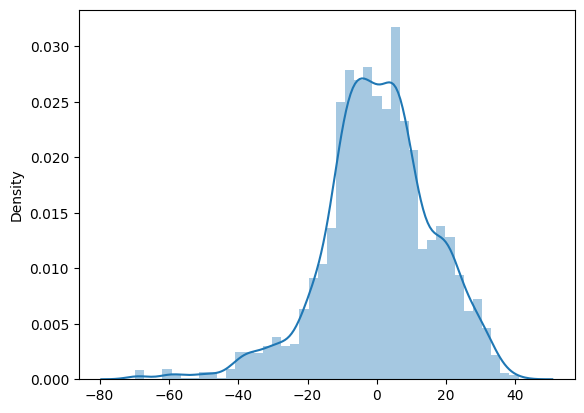

In [30]:
#Visualizing
import seaborn as sns
sns.distplot(Y_test-prediction)
#result- Gaussian Distribution which gives accurate result however some preprocessing can be done

In [31]:
#exploring other meterics
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(Y_test, prediction))
print('MSE: ', metrics.mean_squared_error(Y_test, prediction)) #max result, hence MSE was used
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE:  12.117294527005022
MSE:  251.03172964112716
RMSE:  15.843980864704651


*3.Lasso Regression*

In [32]:
from sklearn.linear_model import Lasso

In [33]:
lasso = Lasso()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.553e+06, tolerance: 2.530e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.482e+06, tolerance: 2.547e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.643e+06, tolerance: 2.668e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [34]:
prediction_lasso = lasso_regressor.predict(X_test)

<ipython-input-35-50d04709aad0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-prediction_lasso)


<Axes: ylabel='Density'>

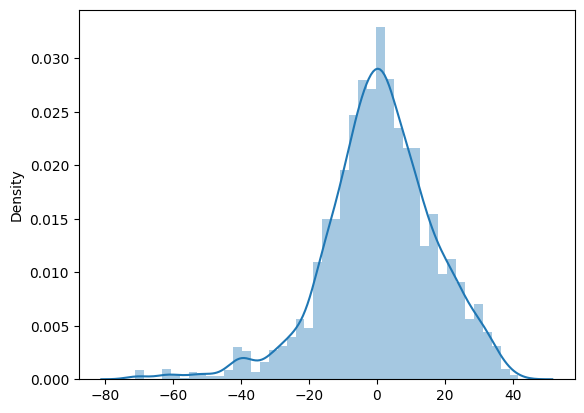

In [35]:
sns.distplot(Y_test-prediction_lasso)

In [36]:

print('MAE: ', metrics.mean_absolute_error(Y_test, prediction_lasso))
print('MSE: ', metrics.mean_squared_error(Y_test, prediction_lasso)) #max result, hence MSE was used
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, prediction_lasso)))

MAE:  12.213583996827493
MSE:  262.3653827960697
RMSE:  16.197696836157593


Checking for the best regression model:

get the best scores and the best parameter(alpha) value; the model with the least best_score value is preferred

In [37]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.4152792487924


In [38]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-320.82214916809124


Ridge Regression is the better choice for building our model as it is much faster and gives more accuracy as indicated by the best_score parameter